In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x, y = make_classification(n_samples=2000, n_classes=2, weights=[0.7, 0.3], random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

#### Gradient Boosting

In [4]:
gb = GradientBoostingClassifier(
    loss='exponential', # 'deviance' or 'exponential'
    learning_rate=0.1,  # Shrinkage (lower = more conservative)
    n_estimators=100,
    subsample=1.0,  # Fraction of samples for each tree
    criterion='friedman_mse',  # Splitting criterion
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,    # Shallow trees (weak learners)
    random_state=42
)

gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Gradient Boosting Accuracy: 0.938


In [ ]:
# Staged predictions (predictions at each stage)
staged_predictions = list(gb.staged_predict(x_test))
print(f"\nAccuracy at different stages:")
for i in [10, 25, 50, 100]:
    if i <= len(staged_predictions):
        stage_acc = accuracy_score(y_test, staged_predictions[i-1])
        print(f"  Stage {i}: {stage_acc:.3f}")


Accuracy at different stages:
  Stage 10: 0.938
  Stage 25: 0.938
  Stage 50: 0.938
  Stage 100: 0.938


**XGBoost**

XGBoost Accuracy: 0.930


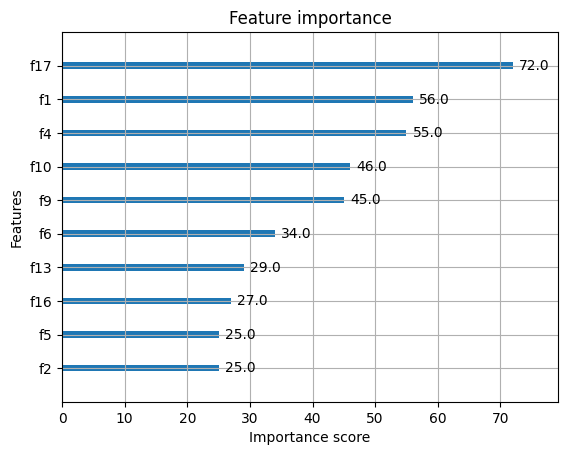

In [7]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42
)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.3f}")

plot_importance(xgb_model, max_num_features=10)
plt.show()

**LightGBM**

In [ ]:
lgb_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    num_leaves=31,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    random_state=42
)
lgb_model.fit(x_train, y_train)

In [13]:
y_pred = lgb_model.predict(x_test)
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred):.3f}")

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
LightGBM Accuracy: 0.935


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


**CatBoost**